# Neural Nets with Feature-Based Extraction

In [2]:
import os
import pandas as pd

### Loading Saved Data

In [3]:
# Load the dataframe from the specified CSV file
wisdm_dataset_path = '/scratch/network/jr8867/wisdm-dataset'
segment_features = f'{wisdm_dataset_path}/segmented'
df = pd.read_csv(os.path.join(segment_features, 'segment_features.csv'))

In [4]:
# Check for NaN values in the dataframe
print(f"Number of rows before dropping NaN values: {len(df)}")
print(f"Number of NaN values in the dataframe: {df.isna().sum().sum()}")

# Drop rows with NaN values
df = df.dropna()

print(f"Number of rows after dropping NaN values: {len(df)}")


Number of rows before dropping NaN values: 3356
Number of NaN values in the dataframe: 1260
Number of rows after dropping NaN values: 3304


In [5]:
df

,subject,activity,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_var,ay_var,...,gy_fft_coef_3,gy_fft_coef_4,gz_dominant_freq,gz_energy,gz_spectral_entropy,gz_fft_coef_0,gz_fft_coef_1,gz_fft_coef_2,gz_fft_coef_3,gz_fft_coef_4
0,1600,A,12.122237,-1.156414,-0.070064,-0.068507,-0.063445,-0.073709,16.601585,6.512648,...,12.446924,14.371058,0.990099,3224.371171,4.968058,16.391161,22.576352,15.223540,20.397892,27.502263
1,1600,A,12.157411,-1.728258,-1.321533,0.096809,-0.029896,0.058534,9.668744,9.385050,...,8.516780,10.022383,0.995025,2442.739344,5.107389,8.912249,15.217091,16.386746,11.897987,3.097034
2,1600,A,12.065984,-1.527586,-0.986893,0.055010,-0.011770,-0.019493,8.831355,4.849988,...,23.136238,14.551532,0.995025,2441.977851,4.933586,15.622510,18.813597,16.236460,11.243929,14.428603
3,1600,A,11.885556,-1.297075,-0.435071,0.131547,-0.098893,0.023381,11.100775,5.045008,...,24.617817,9.747146,0.995025,2261.549563,4.982133,6.778891,2.635339,4.165685,11.845815,20.594674
4,1600,A,12.032942,-1.053903,0.157941,-0.034159,-0.135646,0.045277,8.280093,4.206235,...,12.744734,7.523422,0.995025,2249.516356,5.037985,5.506996,9.704555,10.802612,6.539586,10.451867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,1650,E,8.653584,-4.212563,1.584637,0.001730,-0.001374,-0.000136,0.000919,0.001614,...,0.224866,0.171405,0.298507,0.004190,6.033442,0.104463,0.211898,0.359368,0.108987,0.109761
3352,1650,E,7.042644,-1.576809,5.595675,0.072271,-0.023187,0.055957,5.775549,2.207328,...,7.460953,8.749272,0.199005,25.665597,5.227917,19.315334,26.693794,22.431478,10.970626,8.481362
3353,1650,E,8.353750,-1.924051,4.661865,-0.008679,0.000174,-0.000163,0.001448,0.033901,...,0.327349,0.045002,0.398010,0.009880,6.047068,0.059297,0.211567,0.218398,0.518017,0.140956
3354,1650,E,7.526833,-2.096053,5.237319,-0.002743,0.024246,-0.016826,4.576234,0.776575,...,25.644347,21.852596,0.398010,34.119930,5.329206,9.230250,16.610224,22.577650,24.972065,23.292780


# Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:

# Define features and target variable
X = df.drop(columns=['subject', 'activity'])  # Assuming 'subject' and 'activity' are not features
y = df['activity'].map({'A': 0, 'B': 1, 'D': 2, 'E': 3})

# First, split the data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Now, split the temp set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

Here we are mapping the activity letters to numbers such that they can be fed to models. 
The mapping is as follows:

- A (Walking) -> 0
- B (Jogging) -> 1
- D (Sitting) -> 2
- E (Standing) -> 3

In [27]:
X_train

,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_var,ay_var,az_var,gx_var,...,gy_fft_coef_3,gy_fft_coef_4,gz_dominant_freq,gz_energy,gz_spectral_entropy,gz_fft_coef_0,gz_fft_coef_1,gz_fft_coef_2,gz_fft_coef_3,gz_fft_coef_4
1169,5.513180,-3.172523,-3.429488,0.018675,-0.247734,0.100020,106.229259,116.696671,50.802739,4.153885,...,7.524314,25.790743,1.293532,1233.661842,5.930292,36.758897,20.263593,39.313895,46.736902,8.338890
992,5.168654,-4.877552,6.720358,0.004457,-0.002316,0.000216,0.012651,0.021694,0.011188,0.001678,...,0.625164,0.528857,0.298507,0.289036,6.110226,0.445554,0.694339,2.059945,1.869317,1.004764
2300,2.545138,-4.680661,2.210718,-0.025081,-0.075076,-0.071312,48.028503,29.511150,11.038742,5.155260,...,10.467206,19.185338,0.796020,549.291527,5.565977,68.892203,79.342075,22.334168,48.929256,75.192760
338,6.059802,-4.654753,5.548529,0.053778,0.136152,0.054640,3.564186,3.572625,2.781995,0.189429,...,24.870730,12.304705,0.497512,68.581077,5.880802,14.576413,25.904347,17.169761,24.168326,35.460522
2087,9.552711,-1.641734,-0.167037,-0.007470,0.002006,-0.002004,0.051870,0.021945,0.026877,0.009365,...,1.120361,0.659963,3.880597,1.087052,6.092834,0.332867,0.514975,0.776725,0.955717,0.930571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,-0.704874,-2.877002,9.430242,-0.000861,0.001190,-0.000830,0.002129,0.005234,0.002540,0.000443,...,0.086153,0.050889,2.885572,0.009386,6.443600,0.043190,0.079675,0.041016,0.096786,0.063834
1901,-10.179519,0.708250,0.243291,0.015739,-0.008078,0.032357,3.243396,0.577835,0.877832,0.748954,...,7.344447,6.513730,0.895522,204.829382,5.393233,4.978708,8.235085,2.967749,8.603381,4.366425
1439,1.752193,-6.666145,-4.973481,-0.055559,-0.194517,-0.038874,32.917841,78.060171,23.528701,3.385597,...,9.707767,44.747978,1.492537,403.250940,6.333301,14.552114,3.297563,18.916849,8.230583,18.435308
2491,-7.723513,6.033383,-2.090443,0.001534,0.015600,-0.006077,0.025045,0.152747,0.488887,0.009043,...,4.322525,4.754710,0.398010,1.838071,5.849431,2.484600,3.335711,4.405808,5.428517,5.056074


In [28]:
y_train

1169    1
992     2
2300    0
338     3
2087    3
       ..
2790    2
1901    0
1439    1
2491    3
2184    1
Name: activity, Length: 1982, dtype: int64

# Naive Neural Network

In this section we create a traditional neural network that parses one of these 10-second segment features, and outputs one of 4 classes.

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import ParameterGrid

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes, hidden_layer_1=32, hidden_layer_2=32, activation="leaky_relu"):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer_1)  # First hidden layer
        self.fc2 = nn.Linear(hidden_layer_1, hidden_layer_2)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_layer_2, num_classes)   # Output layer
        self.criterion = nn.CrossEntropyLoss()  # Define loss function
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)  # Define optimizer

        if activation == "leaky_relu":
            self.activation = nn.LeakyReLU()
        elif activation == "relu":
            self.activation = nn.ReLU()
        elif activation == "tanh":
            self.activation = nn.Tanh()
        elif activation == "sigmoid":
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Activation function {activation} not supported")


    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return x

    def train_model(self, X_train, y_train, num_epochs=1000, progress_text=""):
        self.train()  # Set the model to training mode
        
        progress_bar = tqdm(range(num_epochs))
        for epoch in progress_bar:
            self.optimizer.zero_grad()  # Zero the gradients
            outputs = self(torch.FloatTensor(X_train.values))  # Forward pass
            loss = self.criterion(outputs, torch.LongTensor(y_train.values))  # Compute loss
            loss.backward()  # Backward pass
            self.optimizer.step()  # Update weights
            progress_bar.set_description(f"{progress_text}Loss: {loss.item():.4f}")

    def evaluate_model(self, X_test, y_test):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation for inference
            test_outputs = self(torch.FloatTensor(X_test.values))
            _, predicted = torch.max(test_outputs, 1)
            correct = (predicted == torch.LongTensor(y_test.values)).sum().item()
            total = y_test.shape[0]

            return correct / total

In [12]:
input_size = X_train.shape[1]  # Number of features
num_classes = len(y.unique())   # Number of unique classes in the target variable

hyperparameter_grid = {
    "hidden_layer_1": [16, 32, 64, 128],
    "hidden_layer_2": [16, 32, 64, 128],
    "activation": ["leaky_relu", "relu", "tanh", "sigmoid"],
}

best_accuracy = 0
best_params = {}

# Perform grid search
for params in ParameterGrid(hyperparameter_grid):
    model = NeuralNetwork(input_size, num_classes, 
                          hidden_layer_1=params['hidden_layer_1'], 
                          hidden_layer_2=params['hidden_layer_2'], 
                          activation=params['activation'])
    
    # Train the model
    model.train_model(X_train, y_train, num_epochs=5000, progress_text=f"H1: {params['hidden_layer_1']}, H2: {params['hidden_layer_2']}, A: {params['activation'][0]} | ")
    
    # Evaluate the model
    accuracy = model.evaluate_model(X_valid, y_valid)
    
    # Save the best performing hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

H1: 16, H2: 16, A: l | Loss: 0.0008: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 498.12it/s]
H1: 16, H2: 32, A: l | Loss: 0.0010: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 409.96it/s]
H1: 16, H2: 64, A: l | Loss: 0.0002: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 372.91it/s]
H1: 16, H2: 128, A: l | Loss: 0.0002: 100%|████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:18<00:00, 269.94it/s]
H1: 32, H2: 16, A: l | Loss: 0.0001: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 387.06it/s]
H1: 32, H2: 32, A: l | Loss: 0.0001: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 382.14it/s]
H1: 32, H2

Best Hyperparameters: {'activation': 'sigmoid', 'hidden_layer_1': 64, 'hidden_layer_2': 16}
Best Accuracy: 0.913767019667171


In [13]:
# Train the model with the best hyperparameters
model = NeuralNetwork(input_size, num_classes, 
                      hidden_layer_1=best_params['hidden_layer_1'], 
                      hidden_layer_2=best_params['hidden_layer_2'], 
                      activation=best_params['activation'])

X_comb = pd.concat([X_train, X_valid])
y_comb = pd.concat([y_train, y_valid])

model.train_model(X_comb, y_comb, num_epochs=10000, progress_text=f"H1: {best_params['hidden_layer_1']}, H2: {best_params['hidden_layer_2']}, A: {best_params['activation'][0]} | ")


H1: 64, H2: 16, A: s | Loss: 0.0060: 100%|███████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:32<00:00, 309.22it/s]


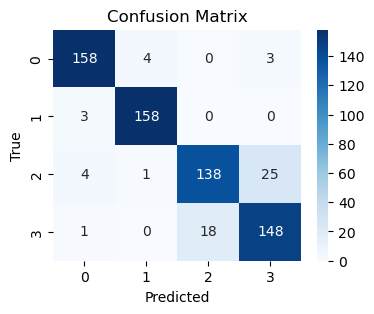

,Class,Accuracy,F1 Score,Precision,Recall
0,0,0.957576,0.954683,0.951807,0.957576
1,1,0.981366,0.975309,0.969325,0.981366
2,2,0.821429,0.851852,0.884615,0.821429
3,3,0.886228,0.862974,0.840909,0.886228


In [14]:
# Get predictions
model.eval()
with torch.no_grad():
    test_outputs = model(torch.FloatTensor(X_test.values))
    _, predicted = torch.max(test_outputs, 1)
    predicted = predicted.numpy()
    y_true = y_test.values

# Create confusion matrix
cm = confusion_matrix(y_true, predicted)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_true), 
            yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
# Calculate precision and recall
precision = precision_score(y_true, predicted, average=None)
recall = recall_score(y_true, predicted, average=None)
# Calculate F1 scores
f1_scores = f1_score(y_true, predicted, average=None)


# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Class': range(len(class_accuracy)),
    'Accuracy': class_accuracy,
    'F1 Score': f1_scores,
    'Precision': precision,
    'Recall': recall
})
metrics_df



The model seems to be really good at differentiating the 4 categories. There is some confusion between sitting and standing, perhaps because they are both relatively stationary.

# Only FFT Features Neural Net

- One could argue that we can create a model based only on the FFT coefs. Here we will test this theory.

In [15]:
filtered_features = [f'{axis}_fft_coef_{i}' for axis in ['ax', 'ay', 'az', 'gx', 'gy', 'gz'] for i in range(5)]

fft_X_train = X_train[filtered_features]
fft_X_valid = X_valid[filtered_features]
fft_X_test = X_test[filtered_features]

In [17]:
input_size = fft_X_train.shape[1]  # Number of features
num_classes = len(y.unique())   # Number of unique classes in the target variable

hyperparameter_grid = {
    "hidden_layer_1": [16, 32, 64, 128],
    "hidden_layer_2": [16, 32, 64, 128],
    "activation": ["leaky_relu", "relu", "tanh", "sigmoid"],
}

best_accuracy = 0
best_params = {}

# Perform grid search
for params in ParameterGrid(hyperparameter_grid):
    model = NeuralNetwork(input_size, num_classes, 
                          hidden_layer_1=params['hidden_layer_1'], 
                          hidden_layer_2=params['hidden_layer_2'], 
                          activation=params['activation'])
    
    # Train the model
    model.train_model(fft_X_train, y_train, num_epochs=5000, progress_text=f"H1: {params['hidden_layer_1']}, H2: {params['hidden_layer_2']}, A: {params['activation'][0]} | ")
    
    # Evaluate the model
    accuracy = model.evaluate_model(fft_X_valid, y_valid)
    
    # Save the best performing hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

H1: 16, H2: 16, A: l | Loss: 0.1735: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 533.24it/s]
H1: 16, H2: 32, A: l | Loss: 0.0319: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 503.05it/s]
H1: 16, H2: 64, A: l | Loss: 0.0294: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 460.85it/s]
H1: 16, H2: 128, A: l | Loss: 0.0057: 100%|████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 380.93it/s]
H1: 32, H2: 16, A: l | Loss: 0.0370: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 507.23it/s]
H1: 32, H2: 32, A: l | Loss: 0.0046: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 452.47it/s]
H1: 32, H2

Best Hyperparameters: {'activation': 'leaky_relu', 'hidden_layer_1': 64, 'hidden_layer_2': 128}
Best Accuracy: 0.7004538577912254


In [18]:
# Train the model with the best hyperparameters
model = NeuralNetwork(input_size, num_classes, 
                      hidden_layer_1=best_params['hidden_layer_1'], 
                      hidden_layer_2=best_params['hidden_layer_2'], 
                      activation=best_params['activation'])

X_comb = pd.concat([fft_X_train, fft_X_valid])
y_comb = pd.concat([y_train, y_valid])

model.train_model(X_comb, y_comb, num_epochs=10000, progress_text=f"H1: {best_params['hidden_layer_1']}, H2: {best_params['hidden_layer_2']}, A: {best_params['activation'][0]} | ")

H1: 64, H2: 128, A: l | Loss: 0.0000: 100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 191.24it/s]


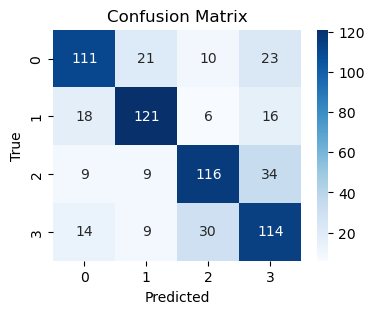

,Class,Accuracy,F1 Score,Precision,Recall
0,0,0.672727,0.700315,0.730263,0.672727
1,1,0.751553,0.753894,0.756250,0.751553
2,2,0.690476,0.703030,0.716049,0.690476
3,3,0.682635,0.644068,0.609626,0.682635


In [19]:
# Get predictions
model.eval()
with torch.no_grad():
    test_outputs = model(torch.FloatTensor(fft_X_test.values))
    _, predicted = torch.max(test_outputs, 1)
    predicted = predicted.numpy()
    y_true = y_test.values

# Create confusion matrix
cm = confusion_matrix(y_true, predicted)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_true), 
            yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
# Calculate precision and recall
precision = precision_score(y_true, predicted, average=None)
recall = recall_score(y_true, predicted, average=None)
# Calculate F1 scores
f1_scores = f1_score(y_true, predicted, average=None)


# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Class': range(len(class_accuracy)),
    'Accuracy': class_accuracy,
    'F1 Score': f1_scores,
    'Precision': precision,
    'Recall': recall
})
metrics_df

This model seems to perform much faster, but however comes at the tradeoff of being less accurate. It's more likely to confuse walking with running and sitting with standing (which makes sense)

# Variance Only Neural Net

In [31]:
filtered_features = [f'{axis}_var' for axis in ['ax', 'ay', 'az', 'gx', 'gy', 'gz']]

var_X_train = X_train[filtered_features]
var_X_valid = X_valid[filtered_features]
var_X_test = X_test[filtered_features]

In [32]:
input_size = var_X_train.shape[1]  # Number of features
num_classes = len(y.unique())   # Number of unique classes in the target variable

hyperparameter_grid = {
    "hidden_layer_1": [16, 32, 64, 128],
    "hidden_layer_2": [16, 32, 64, 128],
    "activation": ["leaky_relu", "relu", "tanh", "sigmoid"],
}

best_accuracy = 0
best_params = {}

# Perform grid search
for params in ParameterGrid(hyperparameter_grid):
    model = NeuralNetwork(input_size, num_classes, 
                          hidden_layer_1=params['hidden_layer_1'], 
                          hidden_layer_2=params['hidden_layer_2'], 
                          activation=params['activation'])
    
    # Train the model
    model.train_model(var_X_train, y_train, num_epochs=5000, progress_text=f"H1: {params['hidden_layer_1']}, H2: {params['hidden_layer_2']}, A: {params['activation'][0]} | ")
    
    # Evaluate the model
    accuracy = model.evaluate_model(var_X_valid, y_valid)
    
    # Save the best performing hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

H1: 16, H2: 16, A: l | Loss: 0.2455: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 550.37it/s]
H1: 16, H2: 32, A: l | Loss: 0.2431: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:09<00:00, 516.30it/s]
H1: 16, H2: 64, A: l | Loss: 0.2087: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 411.58it/s]
H1: 16, H2: 128, A: l | Loss: 0.1874: 100%|████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 384.36it/s]
H1: 32, H2: 16, A: l | Loss: 0.2223: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 472.93it/s]
H1: 32, H2: 32, A: l | Loss: 0.2036: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 431.46it/s]
H1: 32, H2

Best Hyperparameters: {'activation': 'leaky_relu', 'hidden_layer_1': 128, 'hidden_layer_2': 64}
Best Accuracy: 0.8275340393343419


In [33]:
# Train the model with the best hyperparameters
model = NeuralNetwork(input_size, num_classes, 
                      hidden_layer_1=best_params['hidden_layer_1'], 
                      hidden_layer_2=best_params['hidden_layer_2'], 
                      activation=best_params['activation'])

X_comb = pd.concat([var_X_train, var_X_valid])
y_comb = pd.concat([y_train, y_valid])

model.train_model(X_comb, y_comb, num_epochs=10000, progress_text=f"H1: {best_params['hidden_layer_1']}, H2: {best_params['hidden_layer_2']}, A: {best_params['activation'][0]} | ")

H1: 128, H2: 64, A: l | Loss: 0.1260: 100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:15<00:00, 133.11it/s]


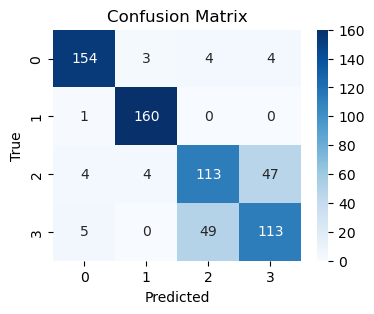

,Class,Accuracy,F1 Score,Precision,Recall
0,0,0.933333,0.936170,0.939024,0.933333
1,1,0.993789,0.975610,0.958084,0.993789
2,2,0.672619,0.676647,0.680723,0.672619
3,3,0.676647,0.682779,0.689024,0.676647


In [34]:
# Get predictions
model.eval()
with torch.no_grad():
    test_outputs = model(torch.FloatTensor(var_X_test.values))
    _, predicted = torch.max(test_outputs, 1)
    predicted = predicted.numpy()
    y_true = y_test.values

# Create confusion matrix
cm = confusion_matrix(y_true, predicted)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_true), 
            yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
# Calculate precision and recall
precision = precision_score(y_true, predicted, average=None)
recall = recall_score(y_true, predicted, average=None)
# Calculate F1 scores
f1_scores = f1_score(y_true, predicted, average=None)


# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Class': range(len(class_accuracy)),
    'Accuracy': class_accuracy,
    'F1 Score': f1_scores,
    'Precision': precision,
    'Recall': recall
})
metrics_df

Variances only is extremely good at differentiated between walking, jogging, and {sitting, standing}. It doesn't perform as well in differentiating sitting vs standing. 